In [1]:
# Import standard data handling and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Import libraries for HTTP requests and machine learning
import requests
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [3]:
# Fetch launch data from the official SpaceX API (hosted by r-spacex GitHub)
url = "https://api.spacexdata.com/v4/launches"
response = requests.get(url)
data = response.json()


In [4]:
# Convert JSON response into a pandas DataFrame
df = pd.json_normalize(data)

# Display first few records to inspect structure
df.head()


,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1...,https://en.wikipedia.org/wiki/Trailblazer_(sat...,NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=dLQ2tZEH6G0,dLQ2tZEH6G0,https://en.wikipedia.org/wiki/Ratsat,https://en.wikipedia.org/wiki/Ratsat,NaN
4,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,[],None,[],[],...,None,None,[],[],http://www.spacex.com/press/2012/12/19/spacexs...,https://www.youtube.com/watch?v=yTaIDooc8Og,yTaIDooc8Og,http://www.spacex.com/news/2013/02/12/falcon-1...,https://en.wikipedia.org/wiki/RazakSAT,NaN


In [5]:
# Select important columns
columns = ['name', 'date_utc', 'success', 'rocket', 'payloads', 'launchpad', 'cores', 'crew', 'flight_number']
df = df[columns]


In [6]:
# Remove rows with missing success values
df = df[df['success'].notna()]


In [7]:
# Convert date_utc to datetime
df['date'] = pd.to_datetime(df['date_utc'])


In [8]:
# Extract year and month as separate features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month


In [9]:
# Convert success column to integer (0 or 1)
df['success'] = df['success'].astype(int)


In [10]:
# Create simplified DataFrame for model training
df_model = df[['year', 'month', 'flight_number', 'success']]
df_model.head()


,year,month,flight_number,success
0,2006,3,1,0
1,2007,3,2,0
2,2008,8,3,0
3,2008,9,4,1
4,2009,7,5,1


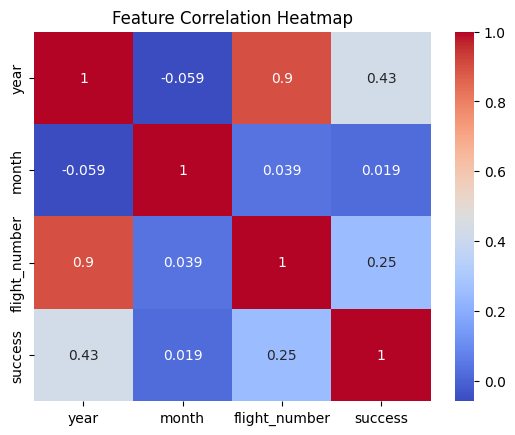

In [11]:
# Plot correlation heatmap
sns.heatmap(df_model.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [12]:
# Define features and target
X = df_model.drop('success', axis=1)
y = df_model['success']


In [13]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [15]:
# Make predictions
y_pred = model.predict(X_test)


In [16]:
# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[38]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        38

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



C:\Users\muham\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
